### Support Vector Machine

support vectors are the vectors help deciding margins

In [1]:
import numpy as np
import matplotlib.pyplot as plt
np.random.seed(6)
import math

In [2]:
from sklearn.datasets.samples_generator import make_blobs

(X,y) =  make_blobs(n_samples=50,n_features=2,centers=2,cluster_std=1.05,random_state=40)
#we need to add 1 to X values (we can say its bias)
X1 = np.c_[np.ones((X.shape[0])),X]

In [3]:
print(X1[:5])
print(y)

[[ 1.          7.12731332 -4.4394424 ]
 [ 1.          6.68873898 -2.44840134]
 [ 1.         -1.1004791  -7.78436803]
 [ 1.          3.99337867 -4.90451269]
 [ 1.         -1.8171622  -9.22909875]]
[1 1 0 1 0 0 1 0 1 0 1 1 0 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 1 1 0 0 1 0 1
 0 1 1 0 0 1 1 1 0 0 1 1 0]


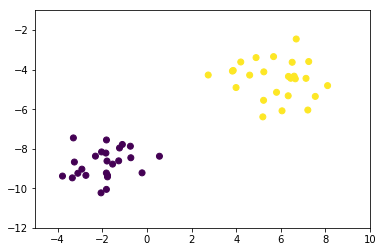

In [25]:
from sklearn.datasets.samples_generator import make_blobs

(X,y) =  make_blobs(n_samples=50,n_features=2,centers=2,cluster_std=1.05,random_state=40)
#we need to add 1 to X values (we can say its bias)
X1 = np.c_[np.ones((X.shape[0])),X]

plt.scatter(X1[:,1],X1[:,2],marker='o',c=y)
plt.axis([-5,10,-12,-1])
plt.show()

In [26]:
# X=X1
# print(X[:3])
# print(y)

In [27]:
postiveX=[]
negativeX=[]
for i,v in enumerate(y):
    if v==0:
        negativeX.append(X[i])
    else:
        postiveX.append(X[i])

#our data dictionary
data_dict = {-1:np.array(negativeX), 1:np.array(postiveX)}
print('-1 class datas:')
print(data_dict[-1][:4])
print('1 class datas:')
print(data_dict[1][:4])

-1 class datas:
[[ -1.1004791   -7.78436803]
 [ -1.8171622   -9.22909875]
 [ -2.05521901 -10.23141199]
 [ -0.21804625  -9.21962706]]
1 class datas:
[[ 7.12731332 -4.4394424 ]
 [ 6.68873898 -2.44840134]
 [ 3.99337867 -4.90451269]
 [ 4.20397723 -3.61164749]]


In [28]:
max_feature_value=float('-inf')
min_feature_value=float('+inf')
        
for yi in data_dict:
    print(yi)
    if np.amax(data_dict[yi])>max_feature_value:
        max_feature_value=np.amax(data_dict[yi])
                
    if np.amin(data_dict[yi])<min_feature_value:
        min_feature_value=np.amin(data_dict[yi])
        
learning_rate = [max_feature_value * 0.1, max_feature_value * 0.01, max_feature_value * 0.001,]

-1
1


In [29]:
print(learning_rate)

[0.809408177937001, 0.08094081779370009, 0.008094081779370009]


In [30]:
#all the required variables 
w=[] #weights 2 dimensional vector
b=[] #bias

In [31]:
def SVM_Training(data_dict):
    i=1
    global w
    global b
    # { ||w||: [w,b] }
    length_Wvector = {}
    transforms = [[1,1],[-1,1],[-1,-1],[1,-1]]
    
    b_step_size = 2
    b_multiple = 5
    w_optimum = max_feature_value*0.5

    for lrate in learning_rate:
        
        w = np.array([w_optimum,w_optimum])     
        optimized = False
        while not optimized:
            #b=[-maxvalue to maxvalue] we wanna maximize the b values so check for every b value
            for b in np.arange(-1*(max_feature_value*b_step_size), max_feature_value*b_step_size, lrate*b_multiple):
                for transformation in transforms:  # transforms = [[1,1],[-1,1],[-1,-1],[1,-1]]
                    w_t = w*transformation
                    
                    correctly_classified = True
                    
                    # every data point should be correct
                    for yi in data_dict:
                        for xi in data_dict[yi]:
                            if yi*(np.dot(w_t,xi)+b) < 1:  # we want  yi*(np.dot(w_t,xi)+b) >= 1 for correct classification
                                correctly_classified = False
                                
                    if correctly_classified:
                        length_Wvector[np.linalg.norm(w_t)] = [w_t,b] #store w, b for minimum magnitude
            
            if w[0] < 0:
                optimized = True
            else:
                w = w - lrate

        norms = sorted([n for n in length_Wvector])
        
        minimum_wlength = length_Wvector[norms[0]]
        w = minimum_wlength[0]
        b = minimum_wlength[1]
        
        w_optimum = w[0]+lrate*2

In [32]:
SVM_Training(data_dict)

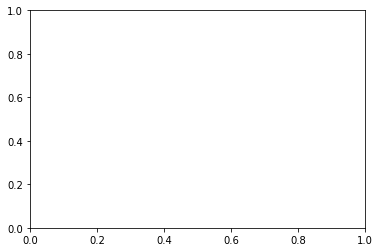

In [33]:
colors = {1:'r',-1:'b'}
fig = plt.figure()
ax = fig.add_subplot(1,1,1)

In [38]:
def visualize(data_dict):
       
        
#         [[ax.scatter(x[0],x[1],s=100,color=colors[i]) for x in data_dict[i]] for i in data_dict]
        
        plt.scatter(X1[:,1],X1[:,2],marker='o',c=y)

        # hyperplane = x.w+b
        # v = x.w+b
        # psv = 1
        # nsv = -1
        # dec = 0
        def hyperplane_value(x,w,b,v):
            return (-w[0]*x-b+v) / w[1]

        datarange = (min_feature_value*0.9,max_feature_value*1.)
        hyp_x_min = datarange[0]
        hyp_x_max = datarange[1]

        # (w.x+b) = 1
        # positive support vector hyperplane
        psv1 = hyperplane_value(hyp_x_min, w, b, 1)
        psv2 = hyperplane_value(hyp_x_max, w, b, 1)
        ax.plot([hyp_x_min,hyp_x_max],[psv1,psv2], 'k')

        # (w.x+b) = -1
        # negative support vector hyperplane
        nsv1 = hyperplane_value(hyp_x_min, w, b, -1)
        nsv2 = hyperplane_value(hyp_x_max, w, b, -1)
        ax.plot([hyp_x_min,hyp_x_max],[nsv1,nsv2], 'k')

        # (w.x+b) = 0
        # positive support vector hyperplane
        db1 = hyperplane_value(hyp_x_min, w, b, 0)
        db2 = hyperplane_value(hyp_x_max, w, b, 0)
        ax.plot([hyp_x_min,hyp_x_max],[db1,db2], 'y--')
        
        plt.axis([-5,10,-12,-1])
        plt.show()

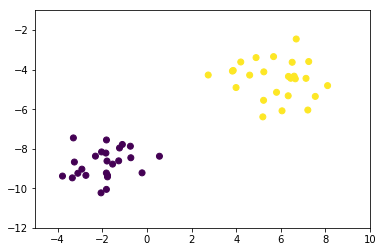

In [39]:
visualize(data_dict)

In [ ]:
def predict(features):
        # sign( x.w+b )
        dot_result = np.sign(np.dot(np.array(features),w)+b)
        return dot_result.astype(int)
    
for i in X[:5]:
    print(predict(i),end=',  ')

The magnitude or length of a vector x is written ∥x∥  and is called its norm.

Talking about the dot product x⋅y is the same as talking about

the inner product  ⟨x,y⟩ (in linear algebra)

f is called the objective function (it is also sometimes called the cost function)

#### Distance from a line( Ax+by+c=0) to a point(x0, y0)


\begin{equation*}
\operatorname{distance}(ax+by+c=0, (x_0, y_0)) = \frac{|ax_0+by_0+c|}{\sqrt{a^2+b^2}}. 
\end{equation*}

Hyperplane H0 to H1 distance = 1/||w|| <br>
so, H1 to H2 distance = 2/||w||

### Refs.
1. https://medium.com/deep-math-machine-learning-ai/chapter-3-1-svm-from-scratch-in-python-86f93f853dc
2. https://medium.com/deep-math-machine-learning-ai/chapter-3-support-vector-machine-with-math-47d6193c82be
3. [nice with basics] https://www.svm-tutorial.com/
4. [Lagrange, tv example] https://www.youtube.com/watch?v=ry9cgNx1QV8
5. [Lagrange, khan-academy] https://www.khanacademy.org/math/multivariable-calculus/applications-of-multivariable-derivatives/constrained-optimization/a/lagrange-multipliers-examples